### загрузка данных

In [57]:
!pip install pandas sqlalchemy openpyxl

In [58]:
import os
import pandas as pd
import uuid


relative_var = os.path.join('.', 'datasets', 'Тестовое_к_Агате_сокращенный_вариант (3).xlsx')
products_category = pd.read_excel(relative_var, sheet_name='products_category')
orders = pd.read_excel(relative_var, sheet_name='orders')
order_items = pd.read_excel(relative_var, sheet_name='order_items')


try:
    
    orders['purchase_timestamp'] = pd.to_datetime(orders['purchase_timestamp'], errors='coerce')
    
    
    invalid_dates = orders[orders['purchase_timestamp'].isna()]
    if not invalid_dates.empty:
        print(f"Найдены некорректные значения в 'purchase_timestamp':\n{invalid_dates}")
        orders['purchase_timestamp'].fillna(pd.Timestamp('1970-01-01'), inplace=True)
except Exception as e:
    print(f"Ошибка при обработке дат: {e}")



### Проверка структуры данных

In [59]:
print(products_category.info())
print(orders.info())
print(order_items.info())
display(products_category.head(30))
products_category.info()

display(orders.head(30))
orders.info()

display(order_items.head(30))
order_items.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   product_id             32951 non-null  object
 1   product_category_name  32328 non-null  object
dtypes: object(2)
memory usage: 515.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45101 entries, 0 to 45100
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_id                 45101 non-null  object        
 1   customer_id              45101 non-null  object        
 2   purchase_timestamp       45101 non-null  datetime64[ns]
 3   delivered_customer_date  43426 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 1.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50864 entries, 0 to 50863
Data columns (total 8 colum

,product_id,product_category_name
0,00066f42aeeb9f3007548bb9d3f33c38,perfumery
1,00088930e925c41fd95ebfe695fd2655,auto
2,0009406fd7479715e4bef61dd91f2462,bed_bath_table
3,000b8f95fcb9e0096488278317764d19,housewares
4,000d9be29b5207b54e86aa1b1ac54872,watches_gifts
5,0011c512eb256aa0dbbb544d8dffcf6e,auto
6,00126f27c813603687e6ce486d909d01,cool_stuff
7,001795ec6f1b187d37335e1c4704762e,consoles_games
8,001b237c0e9bb435f2e54071129237e9,bed_bath_table
9,001b72dfd63e9833e8c02742adf472e3,furniture_decor


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   product_id             32951 non-null  object
 1   product_category_name  32328 non-null  object
dtypes: object(2)
memory usage: 515.0+ KB


,order_id,customer_id,purchase_timestamp,delivered_customer_date
0,00010242fe8c5a6d1ba2dd792cb16214,871766c5855e863f6eccc05f988b23cb,2017-09-13,2017-09-20
1,00018f77f2f0320c557190d7a144bdd3,eb28e67c4c0b83846050ddfb8a35d051,2017-04-26,2017-05-12
2,00042b26cf59d7ce69dfabb4e55b4fd9,64b576fb70d441e8f1b2d7d446e483c5,2017-02-04,2017-03-01
3,00048cc3ae777c65dbb7d2a0634bc1ea,85c835d128beae5b4ce8602c491bf385,2017-05-15,2017-05-22
4,00054e8431b9d7675808bcb819fb4a32,635d9ac1680f03288e72ada3a1035803,2017-12-10,2017-12-18
5,000c3e6612759851cc3cbb4b83257986,f5f088001070650f9e9a8cd773621f35,2017-08-12,2017-08-19
6,000e906b789b55f64edcb1f84030f90d,3588484a539617d91500764822230fb6,2017-11-21,2017-12-09
7,0010b2e5201cc5f1ae7e9c6cc8f5bd00,e883f26917e2095c439f70c2cf8c914b,2017-09-11,2017-09-23
8,0010dedd556712d7bb69a19cb7bbd37a,a77550dd00887c5bb24100ccbd08cbe9,2017-10-21,NaT
9,00119ff934e539cf26f92b9ef0cdfed8,13df7b623839b4edc579ee40279d57c8,2017-08-06,2017-08-16


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45101 entries, 0 to 45100
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_id                 45101 non-null  object        
 1   customer_id              45101 non-null  object        
 2   purchase_timestamp       45101 non-null  datetime64[ns]
 3   delivered_customer_date  43426 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 1.4+ MB


,order_id,Delivery time,order_item_id,product_id,seller_id,price,Sales value,freight_value
0,ec7a019261fce44180373d45b442d78f,6.0,1,f5d8f4fbc70ca2a0038b9a0010ed5cb0,48efc9d94a9834137efd9ea76b065a38,10.90,10.90,8.72
1,bf44408de1d05eef70fb026ba64a90ea,6.0,1,1a2d84c11fbc7b3d7c0a10206c085ce5,b76dba6c951ab00dc4edf0a1aa88037e,10.49,10.49,10.96
2,e1fe072ef14b519af1f0a8ed997c1301,7.0,1,743801b34cc44776de511ba8eff778e2,48efc9d94a9834137efd9ea76b065a38,9.90,9.90,14.52
3,f53b39c6c91ce86717c15d8e4e5da0c2,4.0,1,913580fde3e72c3b3e4ce0b79963bee6,b76dba6c951ab00dc4edf0a1aa88037e,10.99,10.99,14.11
4,157ec3dc3f38cdbd2706bd216edfe8fb,7.0,1,27066995b777fb84dbcb25961fd6d007,46dc3b2cc0980fb8ec44634e21d2718e,159.99,159.99,15.29
5,765442de6466c0bb079c22b8b20e0eab,4.0,1,8a330ba3cd34d650c45bce0fc21771ac,46dc3b2cc0980fb8ec44634e21d2718e,349.99,349.99,17.66
6,9021fdebb45ac827a6033d6969d5c2e3,8.0,1,49e142d8098b20ff2dc9ec73cdd5afec,8f119a0aee85c0c8fc534629734e94fd,34.90,34.90,16.05
7,e6db6e9529fecbe14cd05dd349816656,7.0,1,06ead9c0b05b368667d858c09148af03,b2ba3715d723d245138f291a6fe42594,109.90,109.90,14.94
8,f2dd5f15184c73c0d45c02941c7c23d1,8.0,1,b931645cdc2d9868f01544e8db63f5ab,b14db04aa7881970e83ffa9426897925,65.00,65.00,26.92
9,09f58c00f941827ab206de7796785e44,11.0,1,55ba658d5c2f0b1f118f98c36fe3fa04,48efc9d94a9834137efd9ea76b065a38,8.90,8.90,8.72


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50864 entries, 0 to 50863
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       50864 non-null  object 
 1   Delivery time  49554 non-null  float64
 2   order_item_id  50864 non-null  int64  
 3   product_id     50864 non-null  object 
 4   seller_id      50864 non-null  object 
 5   price          50864 non-null  float64
 6   Sales value    50864 non-null  float64
 7   freight_value  50864 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 3.1+ MB


### удаление дубликатов и пустых значений

In [60]:
products_category = products_category.drop_duplicates()  


orders = orders.drop_duplicates()  
orders = orders.dropna()  


order_items = order_items.drop_duplicates()  
order_items = order_items.dropna()  


print("Products DataFrame после очистки:")
print(products_category.info())

print("Orders DataFrame после очистки:")
print(orders.info())

print("Order_items DataFrame после очистки:")
print(order_items.info())

Products DataFrame после очистки:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   product_id             32951 non-null  object
 1   product_category_name  32328 non-null  object
dtypes: object(2)
memory usage: 515.0+ KB
None
Orders DataFrame после очистки:
<class 'pandas.core.frame.DataFrame'>
Index: 43426 entries, 0 to 45100
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_id                 43426 non-null  object        
 1   customer_id              43426 non-null  object        
 2   purchase_timestamp       43426 non-null  datetime64[ns]
 3   delivered_customer_date  43426 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 1.7+ MB
None
Order_items DataFrame после очистки:
<clas

In [61]:

products_category = products_category.dropna(subset=['product_category_name'])
products_category = products_category.dropna(subset=['product_id'])


orders = orders.dropna(subset=['order_id', 'customer_id'])

In [62]:

products_category['product_id'] = products_category['product_id'].str.strip()


print(products_category.head())

                         product_id product_category_name
0  00066f42aeeb9f3007548bb9d3f33c38             perfumery
1  00088930e925c41fd95ebfe695fd2655                  auto
2  0009406fd7479715e4bef61dd91f2462        bed_bath_table
3  000b8f95fcb9e0096488278317764d19            housewares
4  000d9be29b5207b54e86aa1b1ac54872         watches_gifts


In [63]:

orders['order_id'] = orders['order_id'].str.strip()
orders['customer_id'] = orders['customer_id'].str.strip()


print(orders.head())

                           order_id                       customer_id  \
0  00010242fe8c5a6d1ba2dd792cb16214  871766c5855e863f6eccc05f988b23cb   
1  00018f77f2f0320c557190d7a144bdd3  eb28e67c4c0b83846050ddfb8a35d051   
2  00042b26cf59d7ce69dfabb4e55b4fd9  64b576fb70d441e8f1b2d7d446e483c5   
3  00048cc3ae777c65dbb7d2a0634bc1ea  85c835d128beae5b4ce8602c491bf385   
4  00054e8431b9d7675808bcb819fb4a32  635d9ac1680f03288e72ada3a1035803   

  purchase_timestamp delivered_customer_date  
0         2017-09-13              2017-09-20  
1         2017-04-26              2017-05-12  
2         2017-02-04              2017-03-01  
3         2017-05-15              2017-05-22  
4         2017-12-10              2017-12-18  


In [64]:

order_items['order_id'] = order_items['order_id'].str.strip()
order_items['seller_id'] = order_items['seller_id'].str.strip()

print(order_items.head())

                           order_id  Delivery time  order_item_id  \
0  ec7a019261fce44180373d45b442d78f            6.0              1   
1  bf44408de1d05eef70fb026ba64a90ea            6.0              1   
2  e1fe072ef14b519af1f0a8ed997c1301            7.0              1   
3  f53b39c6c91ce86717c15d8e4e5da0c2            4.0              1   
4  157ec3dc3f38cdbd2706bd216edfe8fb            7.0              1   

                         product_id                         seller_id   price  \
0  f5d8f4fbc70ca2a0038b9a0010ed5cb0  48efc9d94a9834137efd9ea76b065a38   10.90   
1  1a2d84c11fbc7b3d7c0a10206c085ce5  b76dba6c951ab00dc4edf0a1aa88037e   10.49   
2  743801b34cc44776de511ba8eff778e2  48efc9d94a9834137efd9ea76b065a38    9.90   
3  913580fde3e72c3b3e4ce0b79963bee6  b76dba6c951ab00dc4edf0a1aa88037e   10.99   
4  27066995b777fb84dbcb25961fd6d007  46dc3b2cc0980fb8ec44634e21d2718e  159.99   

   Sales value  freight_value  
0        10.90           8.72  
1        10.49          10.96  
2 

In [65]:

products_category['product_id'] = products_category['product_id'].str.replace(" ", "", regex=False)

In [66]:
order_items['order_id'] = order_items['order_id'].str.replace(" ", "", regex=False)

In [67]:
orders['order_id'] = orders['order_id'].str.replace(" ", "", regex=False)

### проверка на дубликаты

In [68]:
# Проверка на дубликаты в таблице
print("Проверка на дубликаты в 'products_category':")
print(products_category.duplicated().sum())  # Количество дубликатов

print("Проверка на дубликаты в 'orders':")
print(orders.duplicated().sum())  # Количество дубликатов

print("Проверка на дубликаты в 'order_items':")
print(order_items.duplicated().sum())  # Количество дубликатов

Проверка на дубликаты в 'products_category':
0
Проверка на дубликаты в 'orders':
0
Проверка на дубликаты в 'order_items':
0


### Проверка на пустые значения (NaN)

In [69]:

print("Проверка на пустые значения в 'products_category':")
print(products_category.isnull().sum())  # Количество пустых значений в каждом столбце

print("Проверка на пустые значения в 'orders':")
print(orders.isnull().sum())  # Количество пустых значений в каждом столбце

print("Проверка на пустые значения в 'order_items':")
print(order_items.isnull().sum())  # Количество пустых значений в каждом столбце

Проверка на пустые значения в 'products_category':
product_id               0
product_category_name    0
dtype: int64
Проверка на пустые значения в 'orders':
order_id                   0
customer_id                0
purchase_timestamp         0
delivered_customer_date    0
dtype: int64
Проверка на пустые значения в 'order_items':
order_id         0
Delivery time    0
order_item_id    0
product_id       0
seller_id        0
price            0
Sales value      0
freight_value    0
dtype: int64


### Проверка на типы данных

In [70]:

print("Типы данных в 'products_category':")
print(products_category.dtypes)

print("Типы данных в 'orders':")
print(orders.dtypes)

print("Типы данных в 'order_items':")
print(order_items.dtypes)

Типы данных в 'products_category':
product_id               object
product_category_name    object
dtype: object
Типы данных в 'orders':
order_id                           object
customer_id                        object
purchase_timestamp         datetime64[ns]
delivered_customer_date    datetime64[ns]
dtype: object
Типы данных в 'order_items':
order_id          object
Delivery time    float64
order_item_id      int64
product_id        object
seller_id         object
price            float64
Sales value      float64
freight_value    float64
dtype: object


### Заменяю пробелы в названиях столбцов на подчеркивания 

In [71]:

order_items.columns = order_items.columns.str.replace(' ', '_', regex=False)

print(order_items.head())

                           order_id  Delivery_time  order_item_id  \
0  ec7a019261fce44180373d45b442d78f            6.0              1   
1  bf44408de1d05eef70fb026ba64a90ea            6.0              1   
2  e1fe072ef14b519af1f0a8ed997c1301            7.0              1   
3  f53b39c6c91ce86717c15d8e4e5da0c2            4.0              1   
4  157ec3dc3f38cdbd2706bd216edfe8fb            7.0              1   

                         product_id                         seller_id   price  \
0  f5d8f4fbc70ca2a0038b9a0010ed5cb0  48efc9d94a9834137efd9ea76b065a38   10.90   
1  1a2d84c11fbc7b3d7c0a10206c085ce5  b76dba6c951ab00dc4edf0a1aa88037e   10.49   
2  743801b34cc44776de511ba8eff778e2  48efc9d94a9834137efd9ea76b065a38    9.90   
3  913580fde3e72c3b3e4ce0b79963bee6  b76dba6c951ab00dc4edf0a1aa88037e   10.99   
4  27066995b777fb84dbcb25961fd6d007  46dc3b2cc0980fb8ec44634e21d2718e  159.99   

   Sales_value  freight_value  
0        10.90           8.72  
1        10.49          10.96  
2 

### Привожу названия столбцов к нижнему регистру

In [72]:
order_items.columns = order_items.columns.str.lower()

print(order_items.head())

                           order_id  delivery_time  order_item_id  \
0  ec7a019261fce44180373d45b442d78f            6.0              1   
1  bf44408de1d05eef70fb026ba64a90ea            6.0              1   
2  e1fe072ef14b519af1f0a8ed997c1301            7.0              1   
3  f53b39c6c91ce86717c15d8e4e5da0c2            4.0              1   
4  157ec3dc3f38cdbd2706bd216edfe8fb            7.0              1   

                         product_id                         seller_id   price  \
0  f5d8f4fbc70ca2a0038b9a0010ed5cb0  48efc9d94a9834137efd9ea76b065a38   10.90   
1  1a2d84c11fbc7b3d7c0a10206c085ce5  b76dba6c951ab00dc4edf0a1aa88037e   10.49   
2  743801b34cc44776de511ba8eff778e2  48efc9d94a9834137efd9ea76b065a38    9.90   
3  913580fde3e72c3b3e4ce0b79963bee6  b76dba6c951ab00dc4edf0a1aa88037e   10.99   
4  27066995b777fb84dbcb25961fd6d007  46dc3b2cc0980fb8ec44634e21d2718e  159.99   

   sales_value  freight_value  
0        10.90           8.72  
1        10.49          10.96  
2 

In [73]:
print(order_items.head())

                           order_id  delivery_time  order_item_id  \
0  ec7a019261fce44180373d45b442d78f            6.0              1   
1  bf44408de1d05eef70fb026ba64a90ea            6.0              1   
2  e1fe072ef14b519af1f0a8ed997c1301            7.0              1   
3  f53b39c6c91ce86717c15d8e4e5da0c2            4.0              1   
4  157ec3dc3f38cdbd2706bd216edfe8fb            7.0              1   

                         product_id                         seller_id   price  \
0  f5d8f4fbc70ca2a0038b9a0010ed5cb0  48efc9d94a9834137efd9ea76b065a38   10.90   
1  1a2d84c11fbc7b3d7c0a10206c085ce5  b76dba6c951ab00dc4edf0a1aa88037e   10.49   
2  743801b34cc44776de511ba8eff778e2  48efc9d94a9834137efd9ea76b065a38    9.90   
3  913580fde3e72c3b3e4ce0b79963bee6  b76dba6c951ab00dc4edf0a1aa88037e   10.99   
4  27066995b777fb84dbcb25961fd6d007  46dc3b2cc0980fb8ec44634e21d2718e  159.99   

   sales_value  freight_value  
0        10.90           8.72  
1        10.49          10.96  
2 

### Проверка на уникальные значения

In [74]:

print("Проверка уникальности 'product_id' в 'products_category':")
print(products_category['product_id'].nunique() == len(products_category))  # True, если все значения уникальны

print("Проверка уникальности 'order_id' в 'orders':")
print(orders['order_id'].nunique() == len(orders))  # True, если все значения уникальны

print("Проверка уникальности 'order_id' в 'order_items':")
print(order_items['order_id'].nunique() == len(order_items))  # True, если все значения уникальны

print("Проверка уникальности 'product_id' в 'order_items':")
print(order_items['product_id'].nunique() == len(order_items))  # True, если все значения уникальны


Проверка уникальности 'product_id' в 'products_category':
True
Проверка уникальности 'order_id' в 'orders':
True
Проверка уникальности 'order_id' в 'order_items':
False
Проверка уникальности 'product_id' в 'order_items':
False


### анализ дубликатов

In [75]:

duplicates = order_items[order_items.duplicated(subset='order_item_id', keep=False)]
print(duplicates)

                               order_id  delivery_time  order_item_id  \
0      ec7a019261fce44180373d45b442d78f            6.0              1   
1      bf44408de1d05eef70fb026ba64a90ea            6.0              1   
2      e1fe072ef14b519af1f0a8ed997c1301            7.0              1   
3      f53b39c6c91ce86717c15d8e4e5da0c2            4.0              1   
4      157ec3dc3f38cdbd2706bd216edfe8fb            7.0              1   
...                                 ...            ...            ...   
49549  17cc6728043d53cc948551dfbf0a338b          142.0              1   
49550  0b7b12a402b064d880d3cb31051f6d29          138.0              1   
49551  29c3b79aace1b72a82b1232bf494e16f          133.0              1   
49552  6e6527028de694ccade37f5a15a6d84a          166.0              1   
49553  ed8e9faf1b75f43ee027103957135663          173.0              1   

                             product_id                         seller_id  \
0      f5d8f4fbc70ca2a0038b9a0010ed5cb0  48efc

In [76]:

duplicates = order_items[order_items.duplicated(subset='product_id', keep=False)]
print(duplicates)

                               order_id  delivery_time  order_item_id  \
0      ec7a019261fce44180373d45b442d78f            6.0              1   
2      e1fe072ef14b519af1f0a8ed997c1301            7.0              1   
3      f53b39c6c91ce86717c15d8e4e5da0c2            4.0              1   
5      765442de6466c0bb079c22b8b20e0eab            4.0              1   
6      9021fdebb45ac827a6033d6969d5c2e3            8.0              1   
...                                 ...            ...            ...   
49548  c5f43352377291361dad9a7366ae1c89          135.0              1   
49549  17cc6728043d53cc948551dfbf0a338b          142.0              1   
49550  0b7b12a402b064d880d3cb31051f6d29          138.0              1   
49551  29c3b79aace1b72a82b1232bf494e16f          133.0              1   
49552  6e6527028de694ccade37f5a15a6d84a          166.0              1   

                             product_id                         seller_id  \
0      f5d8f4fbc70ca2a0038b9a0010ed5cb0  48efc

### удаление дубликатов

In [77]:

order_items = order_items.drop_duplicates(subset='order_id', keep='first')

In [78]:

order_items = order_items.drop_duplicates(subset='product_id', keep='first')

### Проверка на уникальные значения в ключевых столбцах

In [79]:

print("Проверка уникальности 'product_id' в 'products_category':")
print(products_category['product_id'].nunique() == len(products_category))  # True, если все значения уникальны

print("Проверка уникальности 'order_id' в 'orders':")
print(orders['order_id'].nunique() == len(orders))  # True, если все значения уникальны

print("Проверка уникальности 'order_id' в 'order_items':")
print(order_items['order_id'].nunique() == len(order_items))  # True, если все значения уникальны

print("Проверка уникальности 'product_id' в 'order_items':")
print(order_items['product_id'].nunique() == len(order_items))  # True, если все значения уникальны


Проверка уникальности 'product_id' в 'products_category':
True
Проверка уникальности 'order_id' в 'orders':
True
Проверка уникальности 'order_id' в 'order_items':
True
Проверка уникальности 'product_id' в 'order_items':
True


### проверка диапазона

In [80]:

print("Проверка на положительные цены в 'order_items':")
print((order_items['price'] > 0).sum())  # Количество строк с положительными ценами

print("Проверка на разумные временные метки в 'orders':")
print((orders['purchase_timestamp'] > '2020-01-01').sum())  # Количество заказов после 2020 года

Проверка на положительные цены в 'order_items':
16202
Проверка на разумные временные метки в 'orders':
0


### общая проверка на NaN и дубликаты

In [81]:
def check_data_cleanliness(df):
    print(f"Проверка дубликатов: {df.duplicated().sum()} дубликатов")
    print(f"Проверка пустых значений:\n{df.isnull().sum()}")
    print(f"Типы данных:\n{df.dtypes}")


check_data_cleanliness(products_category)
check_data_cleanliness(orders)
check_data_cleanliness(order_items)

Проверка дубликатов: 0 дубликатов
Проверка пустых значений:
product_id               0
product_category_name    0
dtype: int64
Типы данных:
product_id               object
product_category_name    object
dtype: object
Проверка дубликатов: 0 дубликатов
Проверка пустых значений:
order_id                   0
customer_id                0
purchase_timestamp         0
delivered_customer_date    0
dtype: int64
Типы данных:
order_id                           object
customer_id                        object
purchase_timestamp         datetime64[ns]
delivered_customer_date    datetime64[ns]
dtype: object
Проверка дубликатов: 0 дубликатов
Проверка пустых значений:
order_id         0
delivery_time    0
order_item_id    0
product_id       0
seller_id        0
price            0
sales_value      0
freight_value    0
dtype: int64
Типы данных:
order_id          object
delivery_time    float64
order_item_id      int64
product_id        object
seller_id         object
price            float64
sales_valu

### Проверка на наличие выбросов 

In [82]:

print(products_category.describe())  
print(orders.describe())  
print(order_items.describe())  

                              product_id product_category_name
count                              32328                 32328
unique                             32328                    71
top     00066f42aeeb9f3007548bb9d3f33c38        bed_bath_table
freq                                   1                  3029
                  purchase_timestamp        delivered_customer_date
count                          43426                          43426
mean   2017-08-15 13:56:57.289181696  2017-08-28 13:26:46.760926720
min              2017-01-05 00:00:00            2017-01-11 00:00:00
25%              2017-06-01 00:00:00            2017-06-13 00:00:00
50%              2017-08-30 00:00:00            2017-09-11 00:00:00
75%              2017-11-13 00:00:00            2017-11-25 00:00:00
max              2017-12-31 00:00:00            2018-05-21 00:00:00
       delivery_time  order_item_id         price   sales_value  freight_value
count   16202.000000        16202.0  16202.000000  16202.00000

In [83]:
from sqlalchemy import create_engine, text


username = 'myuser'
password = 'mypassword'
host = 'localhost'
port = '5432'  
database = 'mydatabase'


connection_string = f'postgresql://{username}:{password}@{host}:{port}/{database}'


engine = create_engine(connection_string)


truncate_query = """
TRUNCATE TABLE orders CASCADE;
TRUNCATE TABLE order_items CASCADE;
TRUNCATE TABLE products_category CASCADE;

""" 
try:
    with engine.connect() as connection:
        connection.execute(text(truncate_query))
except Exception as e:
    print(f"Ошибка при удалении данных: {e}")
print("Все данные из таблиц успешно удалены.")

Все данные из таблиц успешно удалены.


### Подключение к базе данных PostgreSQL

In [84]:

db_user = "myuser"
db_password = "mypassword"
db_host = "localhost"
db_port = "5432"
db_name = "mydatabase"

connection_string = f"postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}"
engine = create_engine(connection_string)


products_category.to_sql("products_category", engine, if_exists="replace", index=False)
order_items.to_sql("order_items", engine, if_exists="replace", index=False)
orders.to_sql("orders", engine, if_exists="replace", index=False)
print("Импорт завершён!")

Импорт завершён!


### Задание №1 На 3х листах данной книги представлены данные о заказах 2017 года. Опишите, какие данные указаны на каждом из них?

Лист 1: Детализация товаров в заказах Этот лист содержит данные о каждом товаре, входящем в заказы. Поля: 
    -order_id — уникальный идентификатор заказа;
    -order_item_id — идентификатор товара в рамках заказа;
    -product_id — уникальный идентификатор товара;
    -seller_id — идентификатор продавца;
    -price — цена единицы товара;
    -Sales value — итоговая стоимость товара;
    -freight_value — стоимость доставки, распределённая на товар.
 
Лист 2: Информация о заказах Этот лист содержит данные о заказах, включая информацию о клиентах и временные метки: 
    -order_id — уникальный идентификатор заказа;
    -customer_id — идентификатор клиента, сделавшего заказ;
    -purchase_timestamp — дата и время оформления заказа;     delivered_customer_date — дата доставки заказа клиенту. 

Лист 3: Категории товаров Этот лист связывает товары с их категориями: 
    -product_id — уникальный идентификатор товара;
    -product_category_name — название категории, к которой относится товар. 

Итоговая структура книги: 
-Лист 1: Детализация товаров в заказах — детализированные данные по каждому товару в заказах.
-Лист 2: Информация о заказах — данные о клиентах и временные метки заказов. -Лист 3: Категории товаров — данные о товарах и их категориях. Применение: Лист 1 и Лист 3 можно соединить по полю product_id для анализа продаж по категориям товаров. Лист 2 и Лист 1 связываются через order_id для изучения состава заказов и их стоимости. Все три листа вместе могут использоваться для построения полной картины заказов, включая их стоимость, сроки доставки и категории товаров. 


### 2 Сколько заказов было произведено в течение всего обозреваемого периода.

In [85]:
import pandas as pd
from sqlalchemy import create_engine



username = 'myuser'
password = 'mypassword'
host = 'localhost'
port = '5432'  
database = 'mydatabase'


connection_string = f'postgresql://{username}:{password}@{host}:{port}/{database}'


engine = create_engine(connection_string)


query = """
WITH total_orders_cte AS (
    SELECT COUNT(DISTINCT order_id) AS total_orders
    FROM orders 
), 
duplicate_orders_cte AS (
    -- Проверка на дублирующиеся order_id в таблице orders 
    SELECT order_id, COUNT(order_id) AS duplicate_count
    FROM orders 
    GROUP BY order_id 
    HAVING COUNT(*) > 1
), 
missing_orders_cte AS (
    -- Проверка заказов из order_items, которых нет в orders 
    SELECT COUNT(DISTINCT oi.order_id) AS missing_orders 
    FROM order_items oi 
    LEFT JOIN orders o ON oi.order_id = o.order_id 
    WHERE o.order_id IS NULL
) 
SELECT 
    t.total_orders, 
    COALESCE(SUM(d.duplicate_count), 0) AS duplicate_orders,  -- Дубликаты (0, если их нет) 
    m.missing_orders
FROM total_orders_cte t
LEFT JOIN duplicate_orders_cte d ON TRUE 
LEFT JOIN missing_orders_cte m ON TRUE
GROUP BY t.total_orders, m.missing_orders;

"""


result = pd.read_sql(query, engine)


print(result)

   total_orders  duplicate_orders  missing_orders
0         43426               0.0               0


 43426 заказов было произведено в течение всего обозреваемого периода.

### Задание №3 Сколько клиентов производило заказ в июле?

In [86]:
import pandas as pd
from sqlalchemy import create_engine



username = 'myuser'
password = 'mypassword'
host = 'localhost'
port = '5432'  
database = 'mydatabase'


connection_string = f'postgresql://{username}:{password}@{host}:{port}/{database}'


engine = create_engine(connection_string)


query = """
SELECT COUNT(DISTINCT o.customer_id) AS unique_customers_in_july 
FROM orders o 
WHERE EXTRACT(MONTH FROM o.purchase_timestamp) = 7
AND EXTRACT(YEAR FROM o.purchase_timestamp) = 2017;


"""


result = pd.read_sql(query, engine)


print(result)

   unique_customers_in_july
0                      3802


 всего 3802 клиента произволили заказы в июле

### Задание №4 Сколько в среднем доставлялся заказ за указанный диапазон дат? 

In [87]:
import pandas as pd
from sqlalchemy import create_engine



username = 'myuser'
password = 'mypassword'
host = 'localhost'
port = '5432'  
database = 'mydatabase'


connection_string = f'postgresql://{username}:{password}@{host}:{port}/{database}'


engine = create_engine(connection_string)


query = """
SELECT AVG(EXTRACT(DAY FROM o.delivered_customer_date - o.purchase_timestamp)) AS avg_delivery_time 
FROM orders o 
JOIN order_items oi ON o.order_id = oi.order_id 
WHERE o.purchase_timestamp BETWEEN '2017-07-01' AND '2017-07-31'
  AND o.delivered_customer_date IS NOT NULL 
  AND o.delivered_customer_date >= o.purchase_timestamp;



"""


result = pd.read_sql(query, engine)


print(result)

   avg_delivery_time
0          10.955324


 в среднем заказ доставлялся за июль 2017 года 10.95 дней

### Задание №5 Стоит ли использовать среднее значение при оценке времени доставки? Почему да/нет? 
### Обоснуйте свой ответ инфографикой
 



In [88]:
output_dir = os.path.join('.', 'datasets')

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Сохранение DataFrame в формате CSV в папку datasets
try:
    products_category.to_csv(os.path.join(output_dir, 'products_category.csv'), index=False)
    print("Данные products_category успешно сохранены в 'datasets/products_category.csv'.")
except Exception as e:
    print(f"Ошибка при сохранении products_category: {e}")

try:
    order_items.to_csv(os.path.join(output_dir, 'order_items.csv'), index=False)
    print("Данные order_items успешно сохранены в 'datasets/order_items.csv'.")
except Exception as e:
    print(f"Ошибка при сохранении order_items: {e}")
try:
    orders.to_csv(os.path.join(output_dir, 'orders.csv'), index=False)
    print("Данные orders успешно сохранены в 'datasets/order_items.csv'.")
except Exception as e:
    print(f"Ошибка при сохранении order_items: {e}")


Данные products_category успешно сохранены в 'datasets/products_category.csv'.
Данные order_items успешно сохранены в 'datasets/order_items.csv'.
Данные orders успешно сохранены в 'datasets/order_items.csv'.


Index(['order_id', 'customer_id', 'purchase_timestamp',
       'delivered_customer_date'],
      dtype='object')
Среднее время доставки: 12.97904481186386 дней
Медианное время доставки: 11.0 дней
Стандартное отклонение: 9.635810357122507


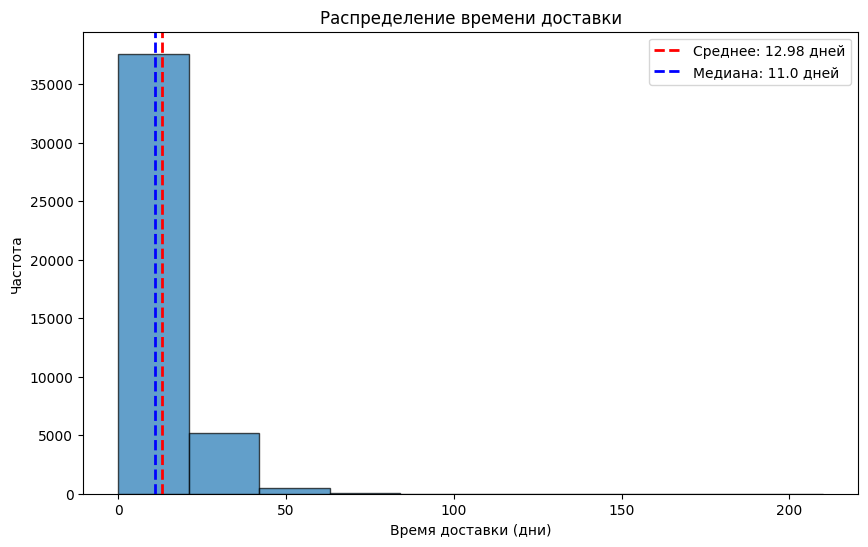

In [89]:
import pandas as pd
import matplotlib.pyplot as plt




print(orders.columns)


orders['purchase_timestamp'] = pd.to_datetime(orders['purchase_timestamp'], errors='coerce')
orders['delivered_customer_date'] = pd.to_datetime(orders['delivered_customer_date'], errors='coerce')


orders['delivery_time'] = (orders['delivered_customer_date'] - orders['purchase_timestamp']).dt.days


avg_delivery_time = orders['delivery_time'].mean()
median_delivery_time = orders['delivery_time'].median()
std_dev_delivery_time = orders['delivery_time'].std()


print(f"Среднее время доставки: {avg_delivery_time} дней")
print(f"Медианное время доставки: {median_delivery_time} дней")
print(f"Стандартное отклонение: {std_dev_delivery_time}")


plt.figure(figsize=(10, 6))
plt.hist(orders['delivery_time'], bins=10, edgecolor='black', alpha=0.7)


plt.axvline(avg_delivery_time, color='red', linestyle='dashed', linewidth=2, label=f'Среднее: {avg_delivery_time:.2f} дней')
plt.axvline(median_delivery_time, color='blue', linestyle='dashed', linewidth=2, label=f'Медиана: {median_delivery_time} дней')


plt.legend()


plt.title('Распределение времени доставки')
plt.xlabel('Время доставки (дни)')
plt.ylabel('Частота')
plt.show()

 Нет, не стоит использовать среднее значение времени доставки.

 Обоснование:
 Среднее время доставки составляет 12.98 дней, а медианное время доставки — 11.0 дней. Это показывает, что медианное значение значительно ниже среднего. Это может свидетельствовать о наличии выбросов или долгих задержек в некоторых заказах, которые сильно увеличивают среднее время.

Стандартное отклонение равняется 9.64 дня, что также указывает на значительные колебания в данных и возможное присутствие экстремальных значений.

Почему среднее не является лучшей метрикой:
Среднее значение чувствительно к выбросам. Если в данных есть несколько заказов с очень долгим временем доставки (например, из-за технических проблем или исключительных обстоятельств), то среднее будет значительно выше, чем большинство заказов.

Медиана — это более стабильная метрика для асимметричных данных, так как она делит все данные пополам и не зависит от экстремальных значений. В вашем случае медиана (11.0 дней) более точно отражает типичное время доставки для большинства заказов.

Инфографика:
 На графике с линиями среднего и медианы, где красная линия (среднее) выше синей линии (медианы), это подчеркивает, что среднее значение может быть искажено выбросами. Это подтверждает, что использование медианы для оценки времени доставки будет более надежным выбором.

Заключение:
 Так как среднее время доставки сильно отличается от медианного, и данные имеют высокое стандартное отклонение, использование среднего может привести к неправильным выводам. Медиана будет более надежной метрикой для оценки типичного времени доставки.

### Задание №6 Сколько уникальных SKU (product_id) было заказано в течение второго квартала?

In [90]:
import pandas as pd
from sqlalchemy import create_engine



username = 'myuser'
password = 'mypassword'
host = 'localhost'
port = '5432'  
database = 'mydatabase'


connection_string = f'postgresql://{username}:{password}@{host}:{port}/{database}'


engine = create_engine(connection_string)


query = """
SELECT COUNT(DISTINCT oi.product_id) AS unique_sku_count
FROM order_items oi
INNER JOIN orders o ON oi.order_id = o.order_id
WHERE o.purchase_timestamp >= '2017-04-01 00:00:00'
AND o.purchase_timestamp < '2017-07-01 00:00:00';



"""


result = pd.read_sql(query, engine)

print(result)

   unique_sku_count
0              3537


 в течении второго квартала 2017 года было 3537 заказов

### Задание №7 Какова была средняя цена товаров заказанных в течение 2ого квартала?

In [91]:
import pandas as pd
from sqlalchemy import create_engine



username = 'myuser'
password = 'mypassword'
host = 'localhost'
port = '5432'  
database = 'mydatabase'


connection_string = f'postgresql://{username}:{password}@{host}:{port}/{database}'


engine = create_engine(connection_string)


query = """
SELECT
    AVG(d.price) AS avg_price
FROM
    order_items d
JOIN
    orders o
    ON d.order_id = o.order_id
JOIN
    products_category c
    ON d.product_id = c.product_id
WHERE
    o.purchase_timestamp BETWEEN '2017-04-01' AND '2017-06-30';


"""


result = pd.read_sql(query, engine)


print(result)

    avg_price
0  154.234024


 средняя цена товаров заказанных в течение 2ого квартала составила 154, 23

### Задание №8  Какая категория является 7ой по популярности за весь период дата-сета (базируясь на заказах)?
### В какой доле заказов содержится данная категория.

In [92]:
import pandas as pd
from sqlalchemy import create_engine



username = 'myuser'
password = 'mypassword'
host = 'localhost'
port = '5432'  
database = 'mydatabase'


connection_string = f'postgresql://{username}:{password}@{host}:{port}/{database}'


engine = create_engine(connection_string)


query = """
WITH category_order_counts AS (
    SELECT 
        pc.product_category_name,
        COUNT(DISTINCT oi.order_id) AS order_count
    FROM order_items oi
    INNER JOIN products_category pc ON oi.product_id = pc.product_id
    GROUP BY pc.product_category_name
),
ranked_categories AS (
    SELECT 
        product_category_name, 
        order_count,
        RANK() OVER (ORDER BY order_count DESC) AS category_rank
    FROM category_order_counts
)
SELECT 
    product_category_name, 
    order_count
FROM ranked_categories
WHERE category_rank = 7;

"""


result = pd.read_sql(query, engine)


print(result)

  product_category_name  order_count
0                  toys          821


 результат показывает, что категория "toys" (игрушки) является 7-й по популярности по количеству заказов, с 821 заказом.

 Теперь, вычислю долю заказов, содержащих товары из этой категории

In [93]:
import pandas as pd
from sqlalchemy import create_engine



username = 'myuser'
password = 'mypassword'
host = 'localhost'
port = '5432'  
database = 'mydatabase'


connection_string = f'postgresql://{username}:{password}@{host}:{port}/{database}'


engine = create_engine(connection_string)


query = """
WITH category_order_counts AS (
    SELECT 
        pc.product_category_name,
        COUNT(DISTINCT oi.order_id) AS order_count
    FROM order_items oi
    INNER JOIN products_category pc ON oi.product_id = pc.product_id
    GROUP BY pc.product_category_name
),
ranked_categories AS (
    SELECT 
        product_category_name, 
        order_count,
        RANK() OVER (ORDER BY order_count DESC) AS category_rank
    FROM category_order_counts
),
total_orders AS (
    SELECT COUNT(DISTINCT order_id) AS total_order_count
    FROM orders
)
SELECT 
    rc.product_category_name, 
    rc.order_count,
    ROUND((rc.order_count::numeric / total_orders.total_order_count::numeric), 4) AS category_order_ratio
FROM ranked_categories rc, total_orders
WHERE rc.category_rank = 7;
"""


result = pd.read_sql(query, engine)


print(result)

  product_category_name  order_count  category_order_ratio
0                  toys          821                0.0189


 Результат запроса показывает, что категория с рангом 7 по количеству заказов — это "toys" (игрушки), с 821 заказом в этом сегменте. Также указана доля этой категории в общем числе заказов, которая составляет 0.0189 (или около 1.89%).

###  Задание №9 В какой доле заказов содержатся продукты категорий bed_bath_table и(или) computers_accessories?

In [94]:
import pandas as pd
from sqlalchemy import create_engine



username = 'myuser'
password = 'mypassword'
host = 'localhost'
port = '5432'  
database = 'mydatabase'


connection_string = f'postgresql://{username}:{password}@{host}:{port}/{database}'


engine = create_engine(connection_string)


query = """
WITH category_order_counts AS (
    SELECT 
        oi.order_id
    FROM order_items oi
    INNER JOIN products_category pc ON oi.product_id = pc.product_id
    WHERE pc.product_category_name IN ('bed_bath_table', 'computers_accessories')
    GROUP BY oi.order_id
),
total_orders AS (
    SELECT COUNT(DISTINCT order_id) AS total_order_count
    FROM orders
)
SELECT 
    COUNT(DISTINCT co.order_id) AS category_order_count,
    ROUND(CAST(COUNT(DISTINCT co.order_id) AS numeric) / 
          CAST((SELECT total_order_count FROM total_orders) AS numeric), 4) AS category_order_ratio
FROM category_order_counts co;
"""


result = pd.read_sql(query, engine)


print(result)

   category_order_count  category_order_ratio
0                  2394                0.0551


 Результат запроса показал, что:

 category_order_count: 2394 — это количество уникальных заказов, в которых присутствуют товары из категорий 'bed_bath_table' и 'computers_accessories'.
category_order_ratio: 0.0551 — это доля таких заказов от общего числа заказов. То есть, примерно 5.51% всех заказов содержат товары из этих категорий.

## Блок 2

 ### Вопрос 1. За последний месяц факт продаж оказался на 15% ниже прогноза и вам необходимо выяснить, в чем причина. Опишите, как бы вы решали эту задачу: какие гипотезы вы бы стали проверять, каким образом и какие данные вам для этого потребуются.

 Для того чтобы разобраться в том, почему фактические продажи оказались на 15% ниже прогноза, я бы предложила следующие шаги, основанные на аналитическом подходе. Это включает формулировку гипотез, сбор данных и их анализ. Вот как я бы подходила к решению задачи:

 1. Понимание контекста и сбор данных
 Прежде чем приступить к анализу, важно понять контекст:

 Какие были сделаны прогнозы и на основании каких данных?
 Что входит в "прогноз" (например, сезонные тренды, предыдущие годы, поведение клиентов)?
 Какие данные у нас есть о продажах?
 Для начала мне понадобятся следующие данные:

 Фактические продажи за последний месяц (например, по дням/неделям).
 Прогноз продаж для этого месяца (также по дням или неделям).
 Исторические данные о продажах (чтобы увидеть тренды, сезонность).
 Клиентские данные (покупательская активность, частота покупок, изменения в поведении клиентов).
 Маркетинговые кампании (если они были запущены в этом месяце).
 Складские запасы (для анализа возможных ограничений по товарам).
 Цены и скидки (изменения цен или акций, которые могли повлиять на продажи).
 2. Формулировка гипотез
 Чтобы объяснить отклонение от прогноза, можно выдвигать следующие гипотезы:

 Гипотеза 1: Снижение покупательской активности.

 Что проверяем: Могло ли снижение активности клиентов (например, меньший поток покупателей или их покупательская способность) объяснить низкие продажи?
 Как проверяем: Сравнение данных о количестве посетителей на сайте/в магазине и конверсии в покупки. Проверка изменения числа повторных покупок.
 Необходимые данные: Трафик на сайт, данные о посетителях, показатели конверсии.
 Гипотеза 2: Понижение эффективности маркетинга или рекламных акций.

 Что проверяем: Были ли изменения в маркетинговых акциях или каналах, которые могли снизить продажи? Например, если какие-то акции не дали ожидаемого результата.
 Как проверяем: Сравнение результатов рекламных кампаний, включая стоимость привлечения клиента (CAC), CTR, ROI на маркетинговые расходы.
 Необходимые данные: Данные по маркетинговым кампаниям (расходы, результаты), информация о промокодах, скидках.
 Гипотеза 3: Снижение доступности товаров (дефицит на складе).

 Что проверяем: Могли ли проблемы с поставками или нехватка товара повлиять на продажи?
 Как проверяем: Анализ остатков на складе, скорости пополнения товара, наличия дефицита товаров, особенно тех, что продаются чаще.
 Необходимые данные: Информация о наличии товаров на складе, данные по поступлению товара, история поставок.
 Гипотеза 4: Изменение цен и скидок.

 Что проверяем: Повлияли ли изменения в ценах (например, повышение цен) или условия скидок на снижение объема продаж?
 Как проверяем: Сравнение динамики продаж до и после изменения цен или акций.
 Необходимые данные: Данные о ценах, скидках, акциях.
 Гипотеза 5: Внешние экономические факторы или изменения в отрасли.

 Что проверяем: Были ли внешние факторы (например, экономический кризис, политическая нестабильность, изменения в законодательстве), которые могли повлиять на покупательскую способность?
 Как проверяем: Анализ внешних данных и корреляция с продажами.
 Необходимые данные: Экономическая информация (например, изменения в ВВП, индекс потребительских цен), новости и события, влияющие на рынок.
 3. Анализ данных
 Для проверки гипотез можно использовать следующие методы:

 Группировка и сравнение данных. Сравнение фактических и прогнозных продаж по дням или неделям, выявление отклонений.
 Анализ трендов и сезонности. Построение временных рядов для анализа сезонных колебаний и трендов продаж.
 А/Б тестирование. Если были проведены маркетинговые кампании, можно провести анализ эффективности с помощью А/Б тестов.
 Когортный анализ. Анализ поведения клиентов по когортах для выявления изменений в клиентском поведении.
 Корреляционный анализ. Проверка связи между продажами и внешними факторами (например, трафик, маркетинговые расходы).
 4. Выводы и рекомендации
 На основании проверки гипотез нужно будет сформулировать выводы о причинах отклонений и разработать рекомендации по улучшению ситуации. Например:

 Увеличение маркетинговых расходов в каналах с высоким ROI.
 Оптимизация складских запасов, чтобы избежать дефицита популярных товаров.
 Коррекция ценовой политики или пересмотр условий акций.
 Заключение
 Для понимания причины снижения продаж необходимо провести комплексный анализ данных, который включает проверку различных гипотез, анализ поведения клиентов, маркетинговых усилий и внешних факторов. Такой подход позволит найти источники проблемы и принять меры для корректировки стратегии.

#### Задание 2. Рассматриваются две группы клиентов, и динамика их трат.В группе 1 в декабре произошло целевое событие, а в группе 2 не произошло.
#### Необходимо на основе графиков ниже сделать вывод/выводы.

 На основании имеющегося графика, можно сказать, что после целевого события в группе 1 в декабре динамика трат группы 1 пошла на снижение. Причем динамика трат группы 2 идет примерно на 15 единиц меньше, но в точности повторяет динамику группы 1. Снижение идет до конца  февраля, с марта идет повышение динамики трат также паралельно каждой группе. Каждый излом говорит о том что данные всзаимозависимы. Событие которое произошло в группе 1 каким-то образом повлияло на группу 2. Для белее полного ответа необходимо дополнительная информация о событии и группах. Неравномерность динамики обоих групп с понижением и повышением уровня трат может быть связано с сезонностью, с повышением или понижением уровня цен, недостаточный товарный ассортимент, товарные запасы. 